In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [2]:
from google.colab import files
uploaded = files.upload()


Saving dawei_tanintharyi_hourly.csv to dawei_tanintharyi_hourly.csv


In [3]:
# Load the dataset
df = pd.read_csv('dawei_tanintharyi_hourly.csv', parse_dates=['timestamp'])


In [4]:
df.head()

,date,hour,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),precipitation (mm),weather_code (wmo code),cloud_cover (%),wind_speed_10m (km/h),is_day (),sunshine_duration (s),shortwave_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),global_tilted_irradiance (W/m²),timestamp,kW
0,2022-01-01,0,23.0,66,16.3,0.0,0,8,10.0,1,0.0,0,0,0.0,0,2022-01-01 00:00:00,3.6
1,2022-01-01,1,24.4,63,16.8,0.0,0,6,13.1,1,2769.6,84,35,307.2,84,2022-01-01 01:00:00,3.6
2,2022-01-01,2,26.3,57,17.0,0.0,0,0,15.2,1,3600.0,284,76,597.4,284,2022-01-01 02:00:00,3.6
3,2022-01-01,3,28.2,49,16.6,0.0,1,21,19.1,1,3600.0,490,95,741.3,490,2022-01-01 03:00:00,3.6
4,2022-01-01,4,29.9,43,15.9,0.0,0,0,19.0,1,3600.0,649,119,785.5,649,2022-01-01 04:00:00,3.6


In [5]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values
df = df.dropna()


date                               0
hour                               0
temperature_2m (°C)                0
relative_humidity_2m (%)           0
dew_point_2m (°C)                  0
precipitation (mm)                 0
weather_code (wmo code)            0
cloud_cover (%)                    0
wind_speed_10m (km/h)              0
is_day ()                          0
sunshine_duration (s)              0
shortwave_radiation (W/m²)         0
diffuse_radiation (W/m²)           0
direct_normal_irradiance (W/m²)    0
global_tilted_irradiance (W/m²)    0
timestamp                          0
kW                                 0
dtype: int64


In [6]:
# Features to use
features = [
    'temperature_2m (°C)',
    'relative_humidity_2m (%)',
    'dew_point_2m (°C)',
    'precipitation (mm)',
    'weather_code (wmo code)',
    'cloud_cover (%)',
    'wind_speed_10m (km/h)',
    'is_day ()',
    'sunshine_duration (s)',
    'shortwave_radiation (W/m²)',
    'diffuse_radiation (W/m²)',
    'direct_normal_irradiance (W/m²)',
    'global_tilted_irradiance (W/m²)',
    'kW'
]

data = df[features]


In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.drop(columns=['kW']))


In [8]:
target_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_target = target_scaler.fit_transform(data[['kW']])


In [9]:
sequence_length = 24  # Adjust as needed
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_target[i])

X, y = np.array(X), np.array(y)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # No shuffling because it's time series data
)


In [11]:
model = Sequential()

# Add LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add output layer
model.add(Dense(units=1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [13]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0386 - val_loss: 0.0144
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0159 - val_loss: 0.0103
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0130 - val_loss: 0.0119
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0110 - val_loss: 0.0133
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0094 - val_loss: 0.0063
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0076 - val_loss: 0.0089
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0074 - val_loss: 0.0082
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0074 - val_loss: 0.0091
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0070 - val_loss: 0.0093
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0073 - val_loss: 0.0080
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/st

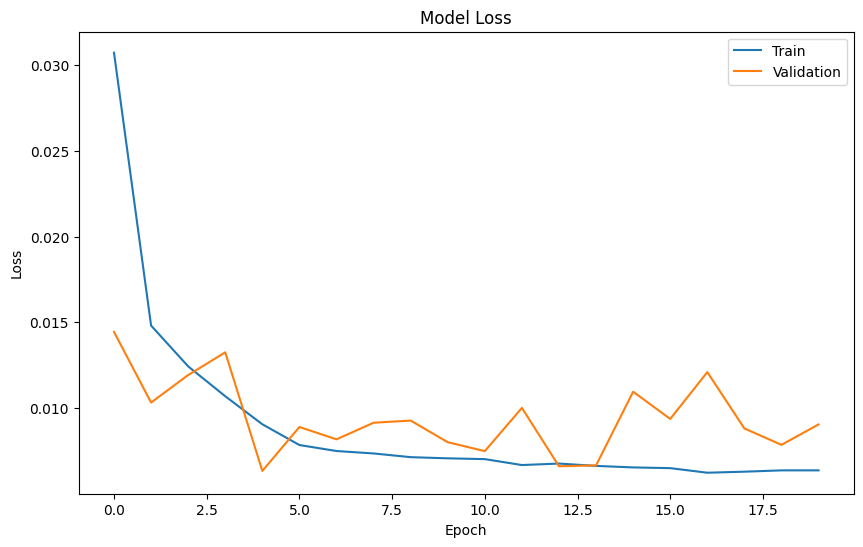

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [15]:
# Predict on the test data
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_inv = target_scaler.inverse_transform(y_pred)
y_test_inv = target_scaler.inverse_transform(y_test)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


MSE: 15.176386063414103
RMSE: 3.8956881373403216
MAE: 2.484555608469458


In [17]:
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100


In [18]:
print(f"Mean Absolute Percentage Error: {mape:.2f}%")

Mean Absolute Percentage Error: 29.78%


In [19]:
# Calculate additional accuracy metric
accuracy = 100 - mape
print(f"\nForecasting Accuracy: {accuracy:.2f}%")


Forecasting Accuracy: 70.22%


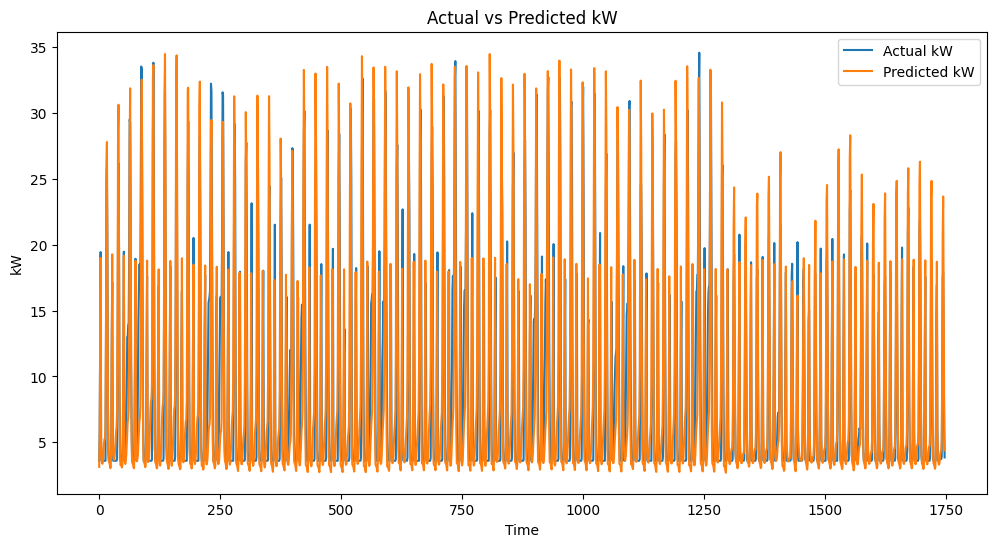

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual kW')
plt.plot(y_pred_inv, label='Predicted kW')
plt.title('Actual vs Predicted kW')
plt.xlabel('Time')
plt.ylabel('kW')
plt.legend()
plt.show()


In [21]:
sequence_length = 24  # Your sequence length

# Extract the timestamps from the original DataFrame
timestamps = df['timestamp'].values  # Convert to numpy array

# Adjust for the sequence length
timestamps = timestamps[sequence_length:]  # Remove initial timestamps not used in sequences


In [22]:
from sklearn.model_selection import train_test_split

# Split the timestamps
_, test_timestamps = train_test_split(
    timestamps, test_size=0.2, shuffle=False
)


In [23]:
print(len(test_timestamps))  # Should be equal to len(y_test_inv)
print(len(y_test_inv))
print(len(y_pred_inv))


1748
1748
1748


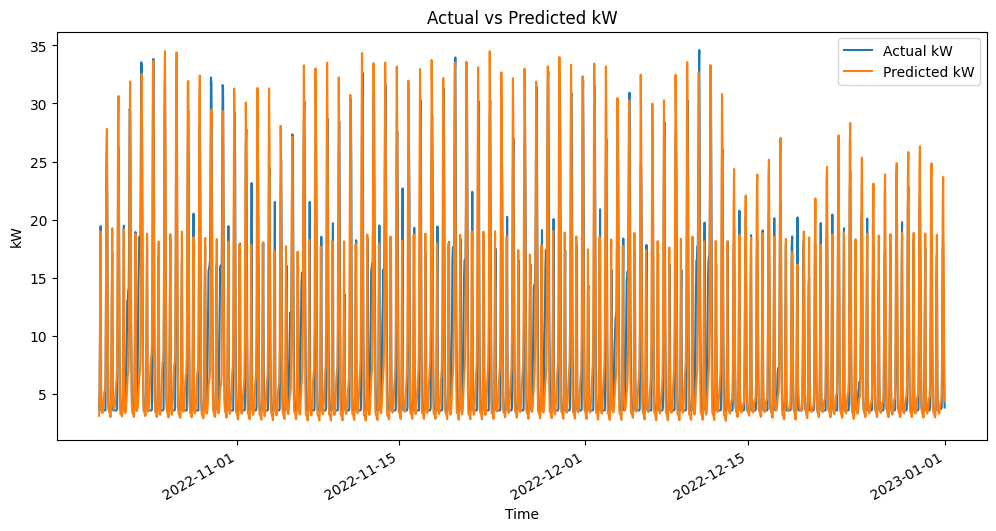

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(test_timestamps, y_test_inv, label='Actual kW')
plt.plot(test_timestamps, y_pred_inv, label='Predicted kW')
plt.title('Actual vs Predicted kW')
plt.xlabel('Time')
plt.ylabel('kW')
plt.legend()
plt.gcf().autofmt_xdate()  # Automatically format the x-axis labels
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0408 - val_loss: 0.0148 - learning_rate: 0.0010
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0170 - val_loss: 0.0130 - learning_rate: 0.0010
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0123 - val_loss: 0.0078 - learning_rate: 0.0010
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0090 - val_loss: 0.0068 - learning_rate: 0.0010
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0075 - val_loss: 0.0046 - learning_rate: 0.0010
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0066 - val_loss: 0.0051 - learning_rate: 0.0010
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0055 - val_loss: 0.0027 - learning_rate: 0.0010
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0042 - val_loss: 0.0022 - learning_rate: 0.0010
Epoch 9/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0032 - val_loss: 0.0048 - learning_rate: 0.0010
Epoch 10/50
110/110 

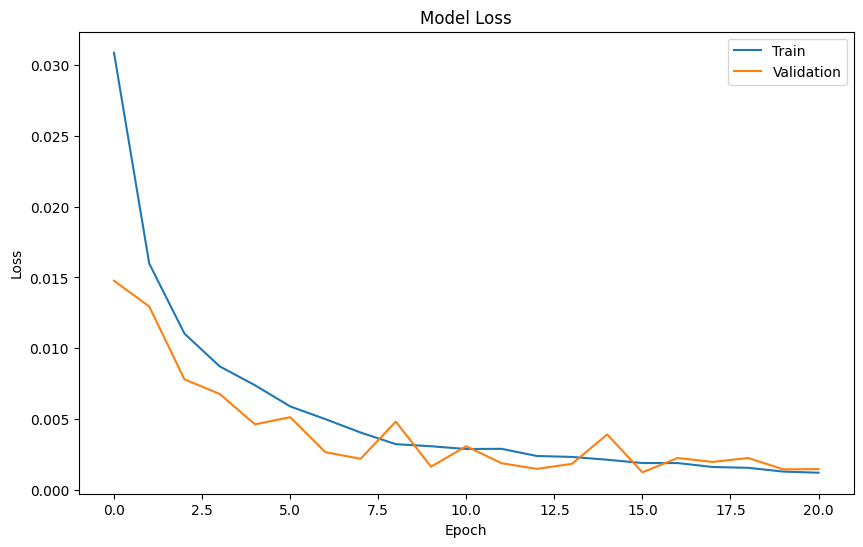

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
MSE: 2.1057741881050935
RMSE: 1.4511285911679548
MAE: 0.945559784041519
Mean Absolute Percentage Error: 11.62%
Forecasting Accuracy: 88.38%


In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('dawei_tanintharyi_hourly.csv', parse_dates=['timestamp'])

# Feature Engineering

# Cyclical encoding for the hour of the day
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

# Add day of the week and month features
df['day_of_week'] = pd.to_datetime(df['date']).dt.dayofweek  # Monday=0, Sunday=6
df['month'] = pd.to_datetime(df['date']).dt.month

# Create lag features
df['kW_lag1'] = df['kW'].shift(1)
df['kW_lag3'] = df['kW'].shift(3)
df['kW_lag6'] = df['kW'].shift(6)

# Create rolling statistics
df['kW_rolling_mean_3'] = df['kW'].rolling(window=3).mean()
df['kW_rolling_mean_6'] = df['kW'].rolling(window=6).mean()
df['temperature_rolling_mean_3'] = df['temperature_2m (°C)'].rolling(window=3).mean()
df['humidity_rolling_std_6'] = df['relative_humidity_2m (%)'].rolling(window=6).std()

# Drop rows with NaN values from lagging and rolling operations
df = df.dropna()

# Select features including engineered ones
features = [
    'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)', 'precipitation (mm)',
    'weather_code (wmo code)', 'cloud_cover (%)', 'wind_speed_10m (km/h)', 'is_day ()',
    'sunshine_duration (s)', 'shortwave_radiation (W/m²)', 'diffuse_radiation (W/m²)',
    'direct_normal_irradiance (W/m²)', 'global_tilted_irradiance (W/m²)', 'hour_sin', 'hour_cos',
    'day_of_week', 'month', 'kW_lag1', 'kW_lag3', 'kW_lag6', 'kW_rolling_mean_3', 'kW_rolling_mean_6',
    'temperature_rolling_mean_3', 'humidity_rolling_std_6'
]

# Normalize the features and target
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])
target_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_target = target_scaler.fit_transform(df[['kW']])

# Prepare sequences for LSTM (sequence_length = 24, equivalent to one day of data)
sequence_length = 24
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_target[i])

X, y = np.array(X), np.array(y)

# Train-test split (80-20), no shuffling as it's time series data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define the LSTM model
model = Sequential()

# Add LSTM layers with more units and dropout for regularization
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))

model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Callbacks for early stopping and learning rate reduction
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stop, reduce_lr]
)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_inv = target_scaler.inverse_transform(y_pred)
y_test_inv = target_scaler.inverse_transform(y_test)

# Calculate performance metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
accuracy = 100 - mape

# Print the results
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')
print(f'Forecasting Accuracy: {accuracy:.2f}%')


# Asking the customer to enter the period of time they want to predict:

Enter the period for prediction: 5
Enter the unit (hours, days, months): days
Predicting for 120 hours.
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0467 - val_loss: 0.0160 - learning_rate: 0.0010
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0180 - val_loss: 0.0106 - learning_rate: 0.0010
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0119 - val_loss: 0.0084 - learning_rate: 0.0010
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0096 - val_loss: 0.0065 - learning_rate: 0.0010
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0067 - val_loss: 0.0049 - learning_rate: 0.0010
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0057 - val_loss: 0.0047 - learning_rate: 0.0010
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0052 - val_loss: 0.0044 - learning_rate: 0.0010
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0039 - val_loss: 0.0024 - learning_rate: 0.0010
Epoch 9/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0033 - val_loss: 0.0027 - learning_rate: 0.0010
Epoch 10/50
11

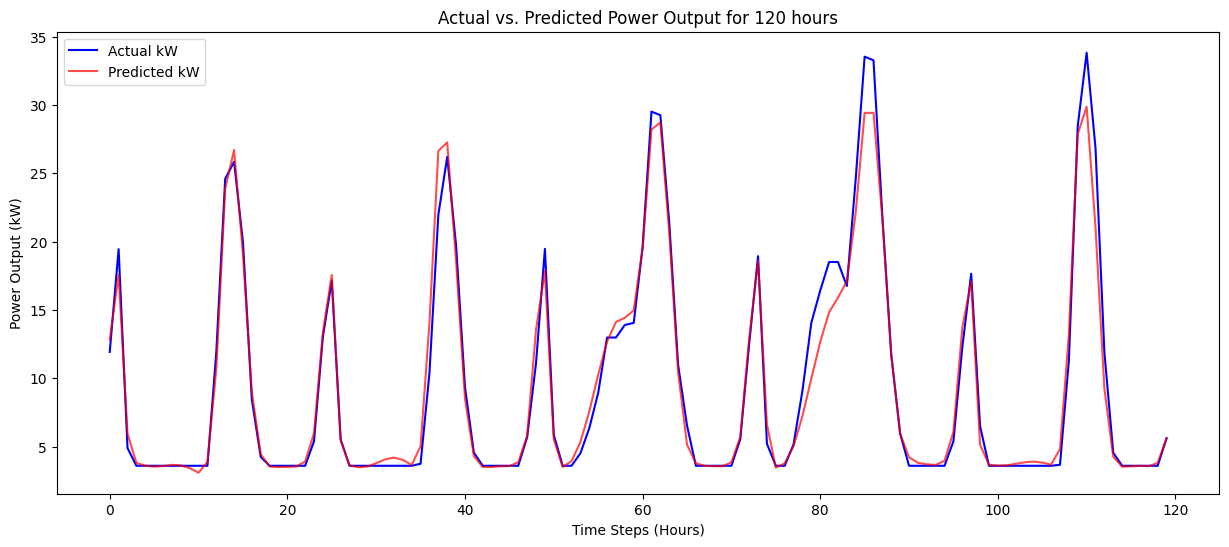

MSE: 1.9490354538352088
RMSE: 1.3960785987311777
MAE: 0.8015388751397445
MAPE: 7.74%
Forecasting Accuracy: 92.26%


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to convert user input to hours
def convert_to_hours(period, unit):
    if unit == "hours":
        return period
    elif unit == "days":
        return period * 24
    elif unit == "months":
        return period * 30 * 24
    else:
        raise ValueError("Invalid unit. Please enter 'hours', 'days', or 'months'.")

# User input
period = int(input("Enter the period for prediction: "))
unit = input("Enter the unit (hours, days, months): ").lower()

# Convert to hours
prediction_hours = convert_to_hours(period, unit)
print(f"Predicting for {prediction_hours} hours.")

# Assuming your model is already trained and X_test, y_test are available

# Data Preprocessing (as per your previous code)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])
target_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_target = target_scaler.fit_transform(df[['kW']])

sequence_length = 24
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])  # Input sequences (last 24 hours)
    y.append(scaled_target[i])  # Output (next hour's kW)

X, y = np.array(X), np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Definition
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Model Training
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stop, reduce_lr]
)

# Prediction based on the user-specified period in hours
if prediction_hours > len(X_test):
    raise ValueError("The requested prediction period exceeds available test data.")

# Make predictions for the required period
y_pred = model.predict(X_test[:prediction_hours])

# Inverse transform the predictions and actual values
y_pred_inv = target_scaler.inverse_transform(y_pred)
y_test_inv = target_scaler.inverse_transform(y_test[:prediction_hours])

# Visualization of predictions against actual values
plt.figure(figsize=(15, 6))
plt.plot(y_test_inv, label='Actual kW', color='blue')
plt.plot(y_pred_inv, label='Predicted kW', color='red', alpha=0.7)
plt.title(f'Actual vs. Predicted Power Output for {prediction_hours} hours')
plt.xlabel('Time Steps (Hours)')
plt.ylabel('Power Output (kW)')
plt.legend()
plt.show()

# Calculate performance metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
accuracy = 100 - mape

# Print performance metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape:.2f}%')
print(f'Forecasting Accuracy: {accuracy:.2f}%')
